In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import pingouin
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r"data\fraudTrain.csv")
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


#### The test data and train data contains is_fraud as the target variable, So we will concatenate them togther to clean them, then make our predictions using train-test-split.

In [3]:
df = pd.DataFrame(train)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [5]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

#### Data Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [10]:
#Drop unnecessary columns
#We will drop lcoation of customer as we will get the distance between Merchant and customer location later
df.drop(columns=['Unnamed: 0','street','state','first','last','trans_num','unix_time'],inplace=True)

In [11]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [12]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0


In [13]:
#Change date type
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'],format='mixed')

In [14]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day_name()
df['month'] = df['trans_date_trans_time'].dt.month

In [15]:
#clean merchant column
df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))

In [16]:
df[['merchant']].head()

,merchant
0,"Rippin, Kub and Mann"
1,"Heller, Gutmann and Zieme"
2,Lind-Buckridge
3,"Kutch, Hermiston and Farrell"
4,Keeling-Crist


In [17]:
#Date of birth --> Age of customer
df['dob'] = pd.to_datetime(df['dob'],format='mixed')
df['age'] = (df['trans_date_trans_time'].dt.year - df['dob'].dt.year).astype(int)
#df.drop(columns='dob',inplace=True)

In [18]:
from geopy.distance import great_circle

# Calculate distance for each row using vectorized operation
df['distance_km'] = round(df.apply(lambda row: great_circle((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).kilometers, axis=1), 2)


In [19]:
df.drop(columns=['lat','long','merch_lat','merch_long'],inplace=True)

In [20]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,dob,is_fraud,hour,day,month,age,distance_km
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,3495,"Psychologist, counselling",1988-03-09,0,0,Tuesday,1,31,78.60
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,149,Special educational needs teacher,1978-06-21,0,0,Tuesday,1,41,30.21


In [21]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
trans_date_trans_time,1296675,2019-10-03 12:47:28.070214144,2019-01-01 00:00:18,2019-06-03 19:12:22.500000,2019-10-03 07:35:47,2020-01-28 15:02:55.500000,2020-06-21 12:13:37,NaN
cc_num,1296675.0,417192042079726656.0,60416207185.0,180042946491150.0,3521417320836166.0,4642255475285942.0,4992346398065154048.0,1308806447000240384.0
amt,1296675.0,70.351035,1.0,9.65,47.52,83.14,28948.9,160.316039
zip,1296675.0,48800.671097,1257.0,26237.0,48174.0,72042.0,99783.0,26893.222476
city_pop,1296675.0,88824.440563,23.0,743.0,2456.0,20328.0,2906700.0,301956.360689
dob,1296675,1973-10-03 19:02:55.017178512,1924-10-30 00:00:00,1962-08-13 00:00:00,1975-11-30 00:00:00,1987-02-22 00:00:00,2005-01-29 00:00:00,NaN
is_fraud,1296675.0,0.005789,0.0,0.0,0.0,0.0,1.0,0.075863
hour,1296675.0,12.804858,0.0,7.0,14.0,19.0,23.0,6.817824
month,1296675.0,6.14215,1.0,3.0,6.0,9.0,12.0,3.417703
age,1296675.0,46.029298,14.0,33.0,44.0,57.0,96.0,17.382373


In [22]:
df.describe(include='object').T

,count,unique,top,freq
merchant,1296675,693,Kilback LLC,4403
category,1296675,14,gas_transport,131659
gender,1296675,2,F,709863
city,1296675,894,Birmingham,5617
job,1296675,494,Film/video editor,9779
day,1296675,7,Monday,254282


In [23]:
df.describe(exclude='object').T

,count,mean,min,25%,50%,75%,max,std
trans_date_trans_time,1296675,2019-10-03 12:47:28.070214144,2019-01-01 00:00:18,2019-06-03 19:12:22.500000,2019-10-03 07:35:47,2020-01-28 15:02:55.500000,2020-06-21 12:13:37,NaN
cc_num,1296675.0,417192042079726656.0,60416207185.0,180042946491150.0,3521417320836166.0,4642255475285942.0,4992346398065154048.0,1308806447000240384.0
amt,1296675.0,70.351035,1.0,9.65,47.52,83.14,28948.9,160.316039
zip,1296675.0,48800.671097,1257.0,26237.0,48174.0,72042.0,99783.0,26893.222476
city_pop,1296675.0,88824.440563,23.0,743.0,2456.0,20328.0,2906700.0,301956.360689
dob,1296675,1973-10-03 19:02:55.017178512,1924-10-30 00:00:00,1962-08-13 00:00:00,1975-11-30 00:00:00,1987-02-22 00:00:00,2005-01-29 00:00:00,NaN
is_fraud,1296675.0,0.005789,0.0,0.0,0.0,0.0,1.0,0.075863
hour,1296675.0,12.804858,0.0,7.0,14.0,19.0,23.0,6.817824
month,1296675.0,6.14215,1.0,3.0,6.0,9.0,12.0,3.417703
age,1296675.0,46.029298,14.0,33.0,44.0,57.0,96.0,17.382373


#### Seggregate the dataset into numerical and categorical datatypes

In [24]:
numerical_columns = df.columns[df.dtypes != "object"]
categorical_columns = df.columns[df.dtypes == 'object']
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: Index(['trans_date_trans_time', 'cc_num', 'amt', 'zip', 'city_pop', 'dob',
       'is_fraud', 'hour', 'month', 'age', 'distance_km'],
      dtype='object')
Categorical Columns: Index(['merchant', 'category', 'gender', 'city', 'job', 'day'], dtype='object')


In [25]:
df[categorical_columns].describe()

,merchant,category,gender,city,job,day
count,1296675,1296675,1296675,1296675,1296675,1296675
unique,693,14,2,894,494,7
top,Kilback LLC,gas_transport,F,Birmingham,Film/video editor,Monday
freq,4403,131659,709863,5617,9779,254282


In [26]:
df[numerical_columns].describe()

,trans_date_trans_time,cc_num,amt,zip,city_pop,dob,is_fraud,hour,month,age,distance_km
count,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,2019-10-03 12:47:28.070214144,4.171920e+17,7.035104e+01,4.880067e+04,8.882444e+04,1973-10-03 19:02:55.017178512,5.788652e-03,1.280486e+01,6.142150e+00,4.602930e+01,7.611476e+01
min,2019-01-01 00:00:18,6.041621e+10,1.000000e+00,1.257000e+03,2.300000e+01,1924-10-30 00:00:00,0.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,2.000000e-02
25%,2019-06-03 19:12:22.500000,1.800429e+14,9.650000e+00,2.623700e+04,7.430000e+02,1962-08-13 00:00:00,0.000000e+00,7.000000e+00,3.000000e+00,3.300000e+01,5.533500e+01
50%,2019-10-03 07:35:47,3.521417e+15,4.752000e+01,4.817400e+04,2.456000e+03,1975-11-30 00:00:00,0.000000e+00,1.400000e+01,6.000000e+00,4.400000e+01,7.823000e+01
75%,2020-01-28 15:02:55.500000,4.642255e+15,8.314000e+01,7.204200e+04,2.032800e+04,1987-02-22 00:00:00,0.000000e+00,1.900000e+01,9.000000e+00,5.700000e+01,9.850000e+01
max,2020-06-21 12:13:37,4.992346e+18,2.894890e+04,9.978300e+04,2.906700e+06,2005-01-29 00:00:00,1.000000e+00,2.300000e+01,1.200000e+01,9.600000e+01,1.521200e+02
std,NaN,1.308806e+18,1.603160e+02,2.689322e+04,3.019564e+05,NaN,7.586269e-02,6.817824e+00,3.417703e+00,1.738237e+01,2.911697e+01


#### Inferences :
* The dataset has both numerical and categorical variables.
* The dataset is long and not wide - good for computation
* There are no null and duplicate values in the dataset

Significant part: To Check correlations between numerical columns

In [27]:
df[numerical_columns].corr()

,trans_date_trans_time,cc_num,amt,zip,city_pop,dob,is_fraud,hour,month,age,distance_km
trans_date_trans_time,1.000000,0.000354,-0.000285,0.000667,-0.001716,0.003642,-0.005041,0.000755,0.183248,0.016730,-0.000627
cc_num,0.000354,1.000000,0.001769,0.041459,-0.008991,0.001145,-0.000981,-0.000801,-0.000281,-0.000279,0.003730
amt,-0.000285,0.001769,1.000000,0.001843,0.005818,0.009748,0.219404,-0.022811,-0.001748,-0.009724,-0.001085
zip,0.000667,0.041459,0.001843,1.000000,0.078467,-0.010642,-0.002162,0.005938,0.000852,0.011004,0.006183
city_pop,-0.001716,-0.008991,0.005818,0.078467,1.000000,0.092545,0.002136,0.020381,0.000137,-0.091295,0.010901
dob,0.003642,0.001145,0.009748,-0.010642,0.092545,1.000000,-0.012391,0.173034,-0.002216,-0.999527,0.004584
is_fraud,-0.005041,-0.000981,0.219404,-0.002162,0.002136,-0.012391,1.000000,0.013799,-0.012409,0.012453,0.000403
hour,0.000755,-0.000801,-0.022811,0.005938,0.020381,0.173034,0.013799,1.000000,-0.000356,-0.172847,0.000332
month,0.183248,-0.000281,-0.001748,0.000852,0.000137,-0.002216,-0.012409,-0.000356,1.000000,-0.009882,0.000098
age,0.016730,-0.000279,-0.009724,0.011004,-0.091295,-0.999527,0.012453,-0.172847,-0.009882,1.000000,-0.004585


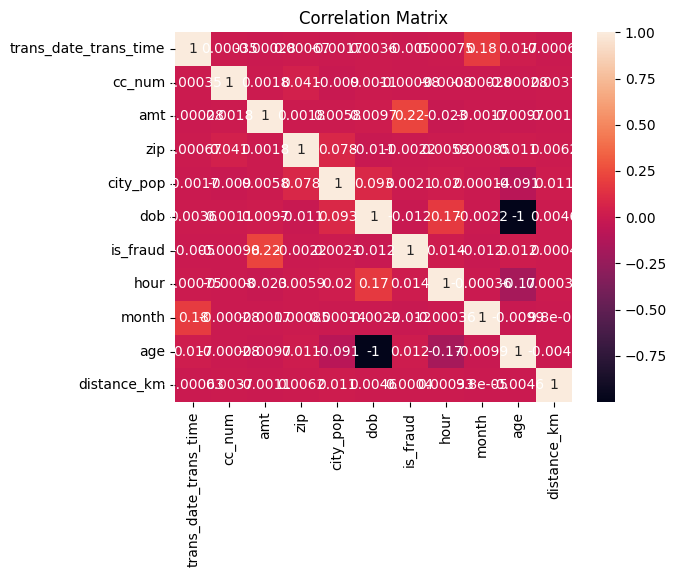

In [28]:
sns.heatmap(df[numerical_columns].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

### Get in depth in data:

Visualization for Numerical Data Types

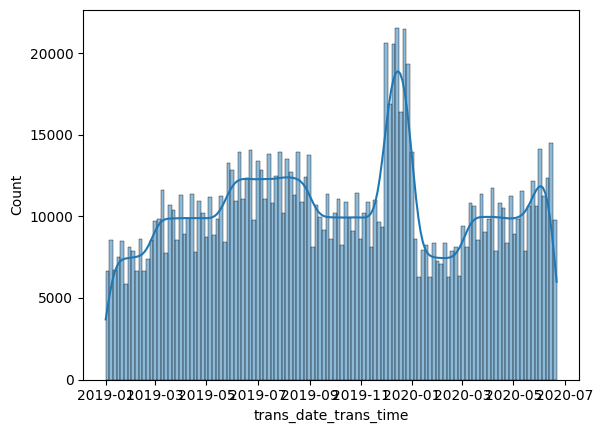

<Figure size 1700x1500 with 0 Axes>

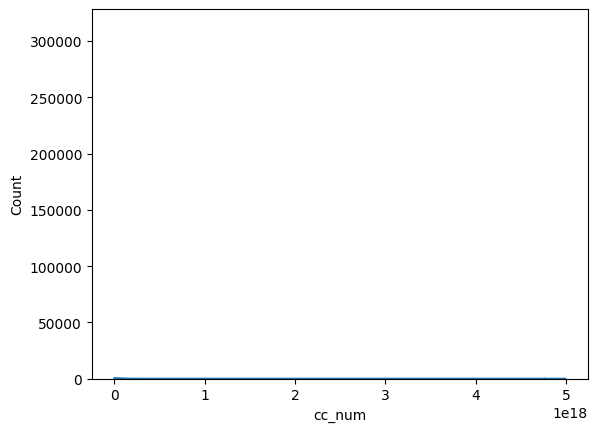

<Figure size 1700x1500 with 0 Axes>

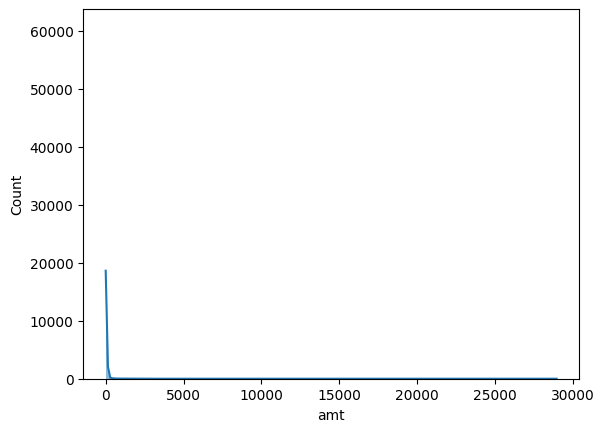

<Figure size 1700x1500 with 0 Axes>

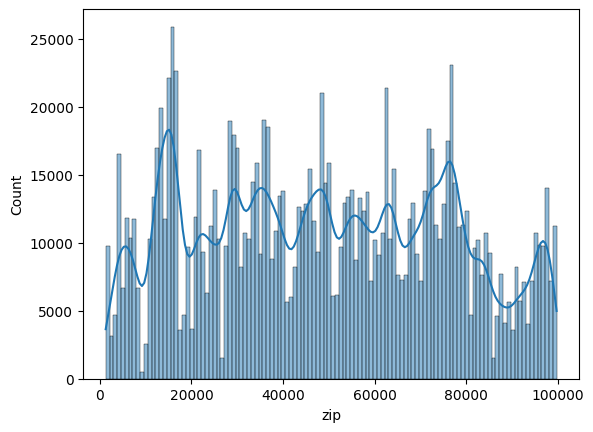

<Figure size 1700x1500 with 0 Axes>

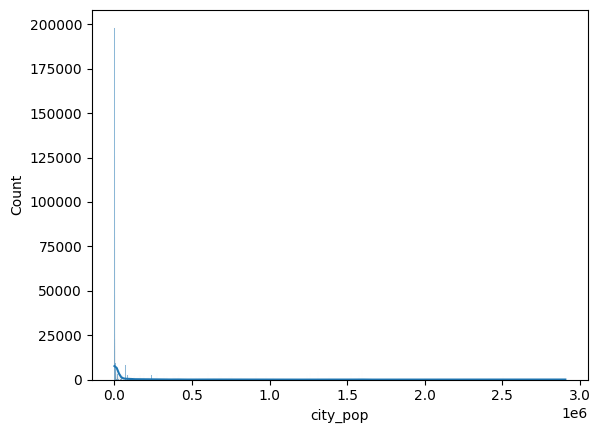

<Figure size 1700x1500 with 0 Axes>

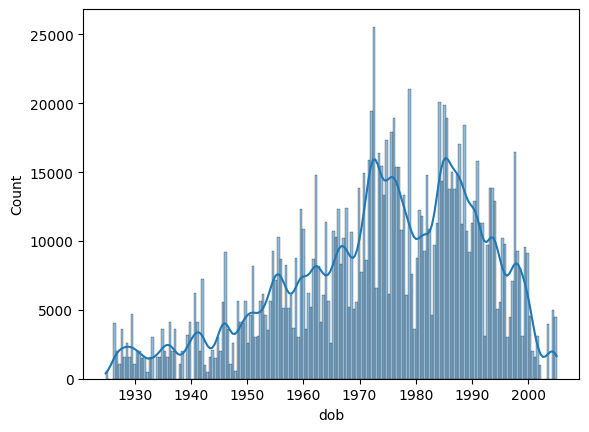

<Figure size 1700x1500 with 0 Axes>

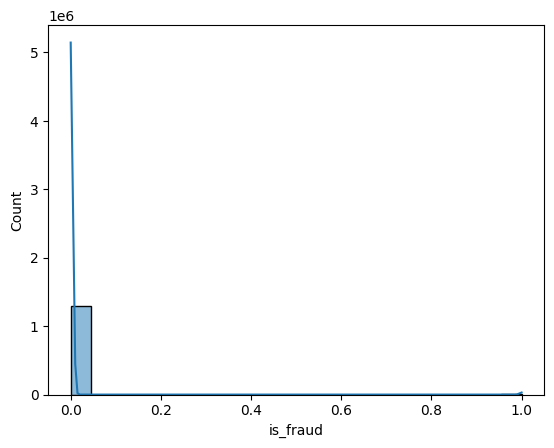

<Figure size 1700x1500 with 0 Axes>

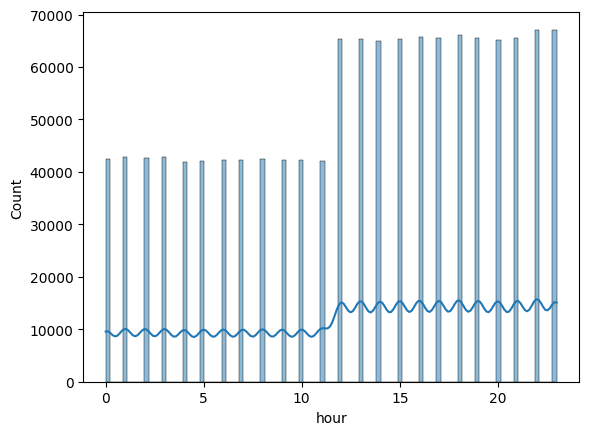

<Figure size 1700x1500 with 0 Axes>

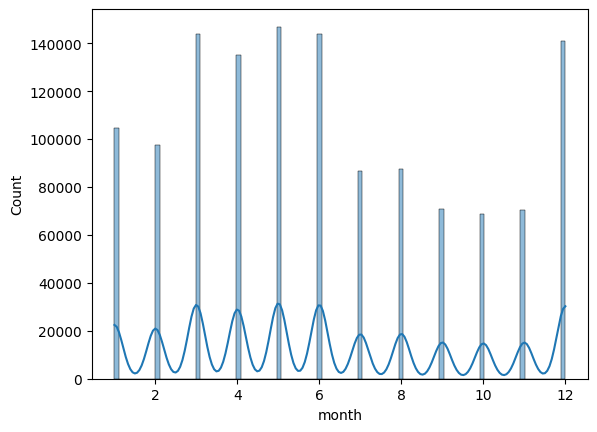

<Figure size 1700x1500 with 0 Axes>

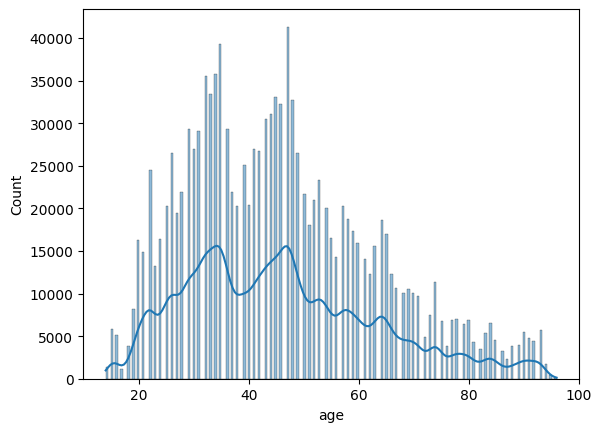

<Figure size 1700x1500 with 0 Axes>

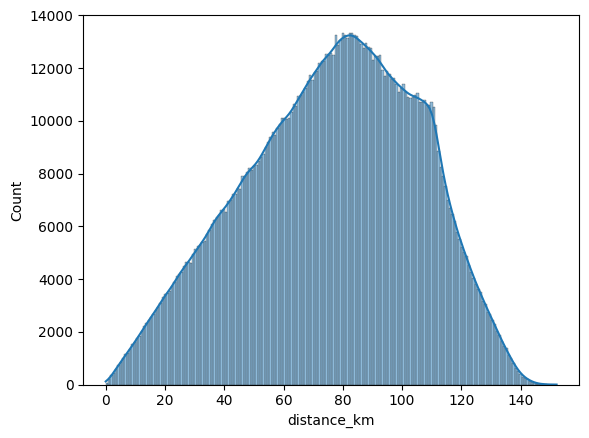

<Figure size 1700x1500 with 0 Axes>

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

x = 1
for i in numerical_columns:
    sns.histplot(data = df, x=i, kde = True)
    print("\n") 
    plt.figure(figsize=(17,15))
    plt.show()

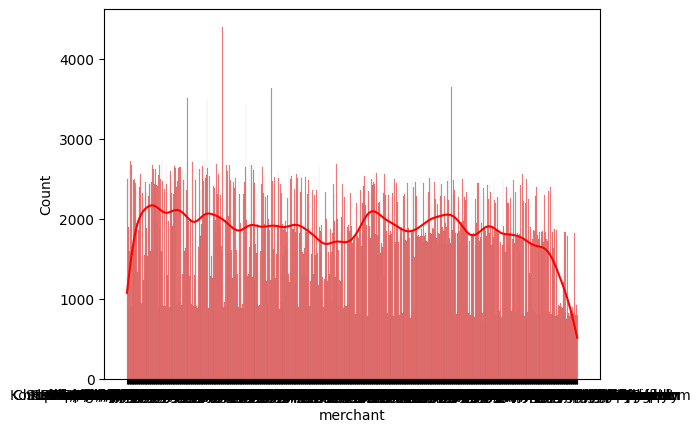

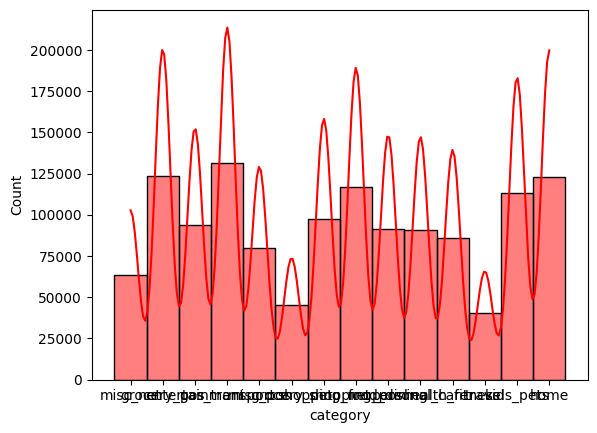

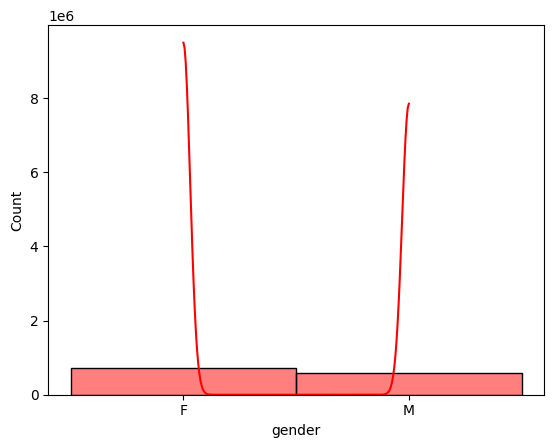

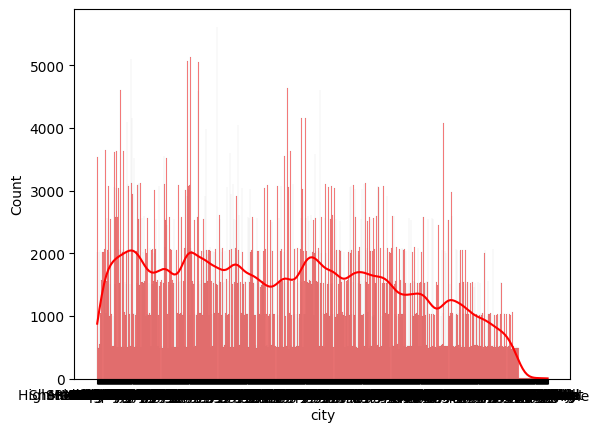

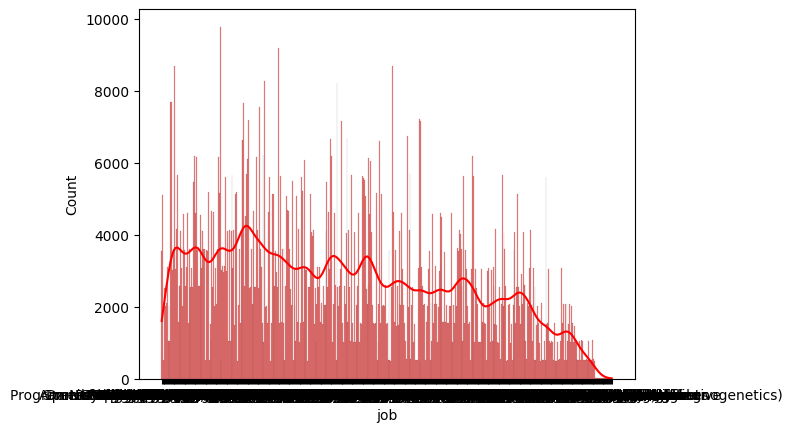

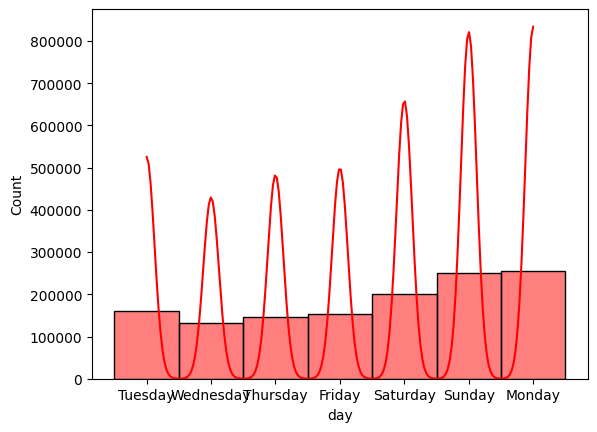

In [30]:
x = 1
for i in categorical_columns:
    sns.histplot(data = df, x=i, kde = True, color= "red")
    print("\n") 
    plt.show()

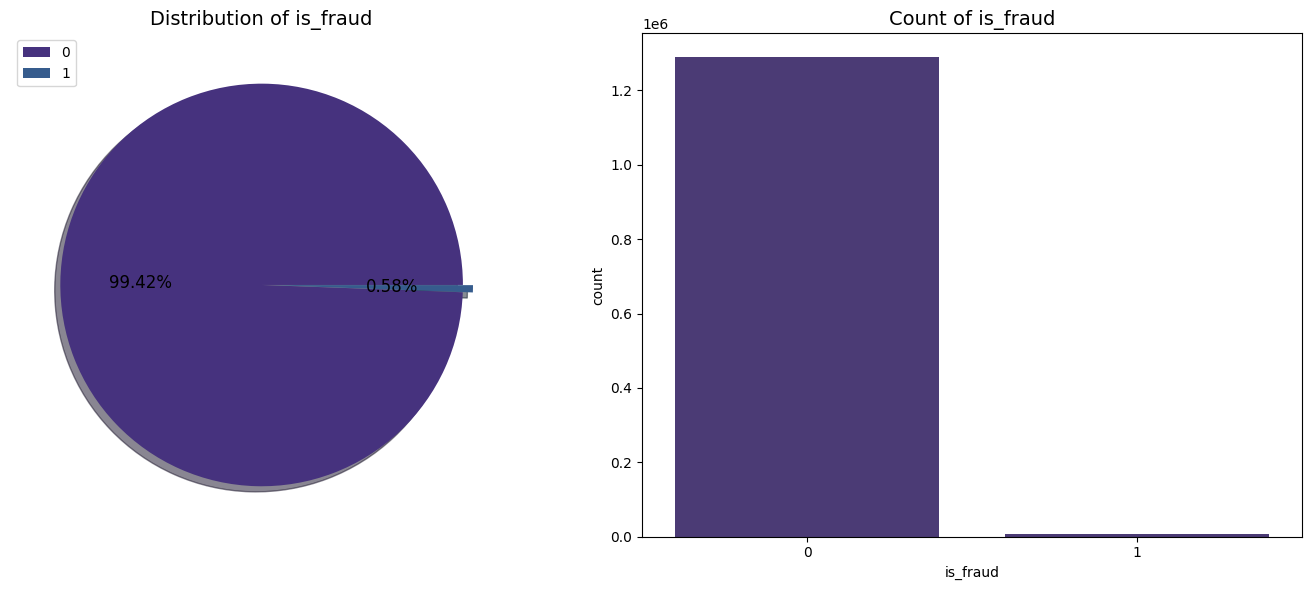

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

def pie_bar_plot(col):
    sns.set_palette('viridis')
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # Pie chart
    axs[0].pie(df[col].value_counts(), autopct='%.2f%%', textprops={'fontsize': 12}, explode=[0, 0.05], shadow=True)
    axs[0].set_title(f'Distribution of {col}', fontsize=14)
    axs[0].legend(labels=df[col].value_counts().index.tolist(), loc='upper left', fontsize=10)
    
    # Count plot
    sns.countplot(data=df, x=col, ax=axs[1])
    axs[1].set_title(f'Count of {col}', fontsize=14)
    
    plt.tight_layout()
    plt.show()



pie_bar_plot('is_fraud')

* We discover that is_fraud column is imbalanced.So will fix that later

In [32]:
df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,dob,is_fraud,hour,day,month,age,distance_km
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,3495,"Psychologist, counselling",1988-03-09,0,0,Tuesday,1,31,78.60
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,149,Special educational needs teacher,1978-06-21,0,0,Tuesday,1,41,30.21
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,M,Malad City,83252,4154,Nature conservation officer,1962-01-19,0,0,Tuesday,1,57,108.21


In [33]:
#We will get the time between transactions for each card
#Time=0 for every first transaction and time will be represented in hours.
df.sort_values(['cc_num', 'trans_date_trans_time'],inplace=True)
df['hours_diff_bet_trans']=((df.groupby('cc_num')[['trans_date_trans_time']].diff())/np.timedelta64(1,'h'))

In [34]:
df['hours_diff_bet_trans']

1017             NaN
2724       19.961667
2726        0.044167
2882        3.843889
2907        0.542222
             ...    
1294934     8.538889
1295369     3.600556
1295587     2.116111
1296206     5.274722
1296427     1.908333
Name: hours_diff_bet_trans, Length: 1296675, dtype: float64

In [35]:
#replacing the null values with 0
df.loc[df['hours_diff_bet_trans'].isna(),'hours_diff_bet_trans'] = 0
df['hours_diff_bet_trans'] = df['hours_diff_bet_trans'].astype(int)

In [36]:
#Handling and extracting features from cc_num
freq = df.groupby('cc_num').size()
df['cc_freq'] = df['cc_num'].apply(lambda x : freq[x])
df[['cc_num','cc_freq']].head()

,cc_num,cc_freq
1017,60416207185,1518
2724,60416207185,1518
2726,60416207185,1518
2882,60416207185,1518
2907,60416207185,1518


In [37]:
#We got freq for each cc_num
def hist_show(col):
    fig,axs = plt.subplots(1,2,sharex=True)
    for i in [0,1]:
        sns.histplot(df[df["is_fraud"]==i][col], bins=6,ax=axs[i])

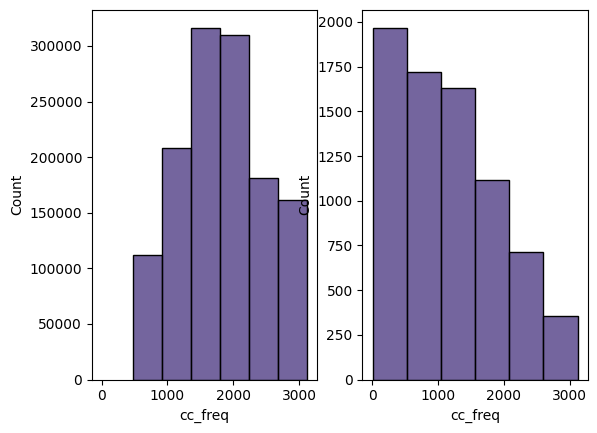

In [38]:
#Visualising cc_freq 
hist_show('cc_freq')

In [39]:
def class_det(x):
    for idx,val in enumerate(list(range(800,5000,800))):
        if x < val:
            return idx+1

In [40]:
df['cc_freq_class'] = df['cc_freq'].apply(class_det)
print(df['cc_freq_class'].unique())

[2 1 3 4]


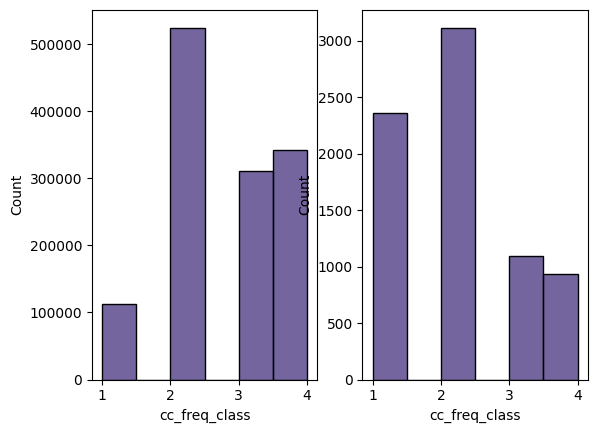

In [41]:
hist_show('cc_freq_class')

Now clearly frauds occurs more in credit cards with less use (new ones) and for genuine transactions, it follows a normal distribution.

In [42]:
#Make day feature numerical
df['day'] = df['trans_date_trans_time'].dt.weekday
df['day'] 

1017       1
2724       2
2726       2
2882       2
2907       2
          ..
1294934    5
1295369    6
1295587    6
1296206    6
1296427    6
Name: day, Length: 1296675, dtype: int32

In [43]:
#Drop unecessary columns
df.drop(columns=['cc_num','trans_date_trans_time','city_pop'],inplace=True)

In [44]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'zip', 'job', 'dob',
       'is_fraud', 'hour', 'day', 'month', 'age', 'distance_km',
       'hours_diff_bet_trans', 'cc_freq', 'cc_freq_class'],
      dtype='object')

In [45]:
#Reorder columns
df = df[['cc_freq','cc_freq_class','city','job','age','gender','merchant', 'category',
         'distance_km','month','day','hour','hours_diff_bet_trans','amt','is_fraud','split']]
df.head()

KeyError: "['split'] not in index"

In [ ]:
df.drop(columns=['split'], inplace= True)

In [ ]:
df.head()

,cc_freq,cc_freq_class,city,job,age,gender,merchant,category,distance_km,month,day,hour,hours_diff_bet_trans,amt,is_fraud
1017,1518,2,Fort Washakie,Information systems manager,33,F,"Jones, Sawayn and Romaguera",misc_net,127.61,1,1,12,0,7.27,0
2724,1518,2,Fort Washakie,Information systems manager,33,F,Berge LLC,gas_transport,110.31,1,2,8,19,52.94,0
2726,1518,2,Fort Washakie,Information systems manager,33,F,Luettgen PLC,gas_transport,21.79,1,2,8,0,82.08,0
2882,1518,2,Fort Washakie,Information systems manager,33,F,Daugherty LLC,kids_pets,87.20,1,2,12,3,34.79,0
2907,1518,2,Fort Washakie,Information systems manager,33,F,Beier and Sons,home,74.21,1,2,13,0,27.18,0


Seggregate the input and output variables

In [ ]:
X = df.drop(columns=['is_fraud'], axis = 1)
Y = df["is_fraud"]

In [ ]:
X

,cc_freq,cc_freq_class,city,job,age,gender,merchant,category,distance_km,month,day,hour,hours_diff_bet_trans,amt
1017,1518,2,Fort Washakie,Information systems manager,33,F,"Jones, Sawayn and Romaguera",misc_net,127.61,1,1,12,0,7.27
2724,1518,2,Fort Washakie,Information systems manager,33,F,Berge LLC,gas_transport,110.31,1,2,8,19,52.94
2726,1518,2,Fort Washakie,Information systems manager,33,F,Luettgen PLC,gas_transport,21.79,1,2,8,0,82.08
2882,1518,2,Fort Washakie,Information systems manager,33,F,Daugherty LLC,kids_pets,87.20,1,2,12,3,34.79
2907,1518,2,Fort Washakie,Information systems manager,33,F,Beier and Sons,home,74.21,1,2,13,0,27.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294934,2059,3,Mc Nabb,Audiological scientist,64,M,"Berge, Kautzer and Harris",personal_care,78.49,6,5,21,8,60.47
1295369,2059,3,Mc Nabb,Audiological scientist,64,M,Bernhard Inc,gas_transport,55.40,6,6,0,3,74.29
1295587,2059,3,Mc Nabb,Audiological scientist,64,M,"Reichert, Rowe and Mraz",shopping_net,115.67,6,6,2,2,246.56
1296206,2059,3,Mc Nabb,Audiological scientist,64,M,Jewess LLC,shopping_pos,60.51,6,6,8,5,2.62


In [ ]:
Y

1017       0
2724       0
2726       0
2882       0
2907       0
          ..
1294934    0
1295369    0
1295587    0
1296206    0
1296427    0
Name: is_fraud, Length: 1296675, dtype: int64

In [ ]:
numerical_columns = X.select_dtypes(exclude= 'object').columns
categorical_columns = X.select_dtypes(include= 'object').columns

In [ ]:
numerical_columns

Index(['cc_freq', 'cc_freq_class', 'age', 'distance_km', 'month', 'day',
       'hour', 'hours_diff_bet_trans', 'amt'],
      dtype='object')

In [ ]:
categorical_columns

Index(['city', 'job', 'gender', 'merchant', 'category'], dtype='object')

In [ ]:
df["city"].value_counts().sort_values()

city
Bruce             7
Streator          7
Karns City        7
Chattanooga       7
Vacaville         7
               ... 
Meridian       5060
Phoenix        5075
Utica          5105
San Antonio    5130
Birmingham     5617
Name: count, Length: 894, dtype: int64

In [ ]:
df["job"].value_counts().sort_values()

job
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Information officer              8
Veterinary surgeon               8
                              ... 
Materials engineer            8270
Surveyor, land/geomatics      8680
Naval architect               8684
Exhibition designer           9199
Film/video editor             9779
Name: count, Length: 494, dtype: int64

In [ ]:
df["gender"].value_counts().sort_values()

gender
M    586812
F    709863
Name: count, dtype: int64

In [ ]:
df["merchant"].value_counts().sort_values()

merchant
Hahn, Douglas and Schowalter       727
Reichert-Weissnat                  753
Medhurst, Labadie and Gottlieb     759
Treutel-King                       775
Douglas, DuBuque and McKenzie      775
                                  ... 
Boyer PLC                         3493
Kuhn LLC                          3510
Schumm PLC                        3634
Cormier LLC                       3649
Kilback LLC                       4403
Name: count, Length: 693, dtype: int64

In [ ]:
df["category"].value_counts().sort_values()

category
travel             40507
grocery_net        45452
misc_net           63287
misc_pos           79655
health_fitness     85879
personal_care      90758
food_dining        91461
entertainment      94014
shopping_net       97543
kids_pets         113035
shopping_pos      116672
home              123115
grocery_pos       123638
gas_transport     131659
Name: count, dtype: int64

Handling categorical_columns

In [ ]:
df.head()

,cc_freq,cc_freq_class,city,job,age,gender,merchant,category,distance_km,month,day,hour,hours_diff_bet_trans,amt,is_fraud
1017,1518,2,Fort Washakie,Information systems manager,33,F,"Jones, Sawayn and Romaguera",misc_net,127.61,1,1,12,0,7.27,0
2724,1518,2,Fort Washakie,Information systems manager,33,F,Berge LLC,gas_transport,110.31,1,2,8,19,52.94,0
2726,1518,2,Fort Washakie,Information systems manager,33,F,Luettgen PLC,gas_transport,21.79,1,2,8,0,82.08,0
2882,1518,2,Fort Washakie,Information systems manager,33,F,Daugherty LLC,kids_pets,87.20,1,2,12,3,34.79,0
2907,1518,2,Fort Washakie,Information systems manager,33,F,Beier and Sons,home,74.21,1,2,13,0,27.18,0


Pipeline

In [ ]:
from sklearn.impute import SimpleImputer # Missing values
from sklearn.preprocessing import StandardScaler # Feature scaling (Numerical datatypes)
from sklearn.preprocessing import OneHotEncoder # To rank the categorical variables
#Pipeline 
from sklearn.pipeline import Pipeline # To club everything together 
from sklearn.compose import ColumnTransformer # Begin the work 
from sklearn.model_selection import train_test_split

In [ ]:
numerical_columns

Index(['cc_freq', 'cc_freq_class', 'age', 'distance_km', 'month', 'day',
       'hour', 'hours_diff_bet_trans', 'amt'],
      dtype='object')

In [ ]:
categorical_columns

Index(['city', 'job', 'gender', 'merchant', 'category'], dtype='object')

In [ ]:
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")), 
        ("scaler", StandardScaler(with_mean=False))
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")), 
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    [
        ("num_pipeline", num_pipeline, numerical_columns), 
        ("cat_pipeline", cat_pipeline, categorical_columns)
    ]
)



Train - Test - Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.15, random_state= 45285)

In [ ]:
datasets={'x_train':X_train,'x_test':X_test}
cols = ['hours_diff_bet_trans', 'amt']

In [ ]:
#Checking for outliers
from datasist.structdata import detect_outliers

def count_outliers(l:list):
    for col in l:
        print(f'Outliers In {col}:',len(detect_outliers(X_train,0,[col])))

In [ ]:
count_outliers(cols)

Outliers In hours_diff_bet_trans: 74018
Outliers In amt: 57146


In [ ]:
#Applying log scale
for col in cols:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])

In [ ]:
count_outliers(cols)

Outliers In hours_diff_bet_trans: 188
Outliers In amt: 680


- As log transformations make the distribution more symmetric and reduce the impact of extreme values(We did not removed them).Also we can deal with these data separately,But for now: log functions are commonly used to handle right-skewed distributions. 

In [ ]:
# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)

# Transform the test data
X_test = preprocessor.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logistic_regression_model.predict(X_test)

In [ ]:
y_pred

Predictions: [0 0 0 ... 0 0 0]


Evaluating the models

Model: LogisticRegression
______________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193383
           1       0.86      0.27      0.41      1119

    accuracy                           1.00    194502
   macro avg       0.93      0.63      0.70    194502
weighted avg       0.99      1.00      0.99    194502



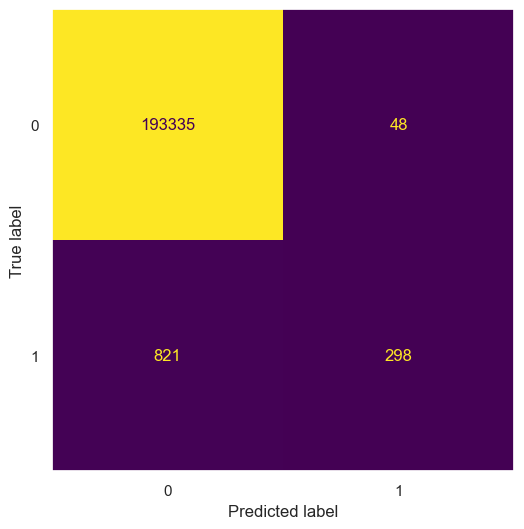

Accuracy Score: 0.9955321796176904
Running Time: 0.09 Mins
******************************


Model: DecisionTreeClassifier
______________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193383
           1       0.85      0.80      0.83      1119

    accuracy                           1.00    194502
   macro avg       0.93      0.90      0.91    194502
weighted avg       1.00      1.00      1.00    194502



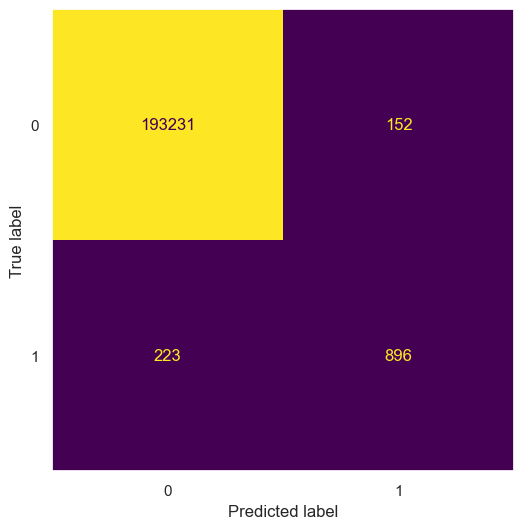

Accuracy Score: 0.9980719992596477
Running Time: 1.65 Mins
******************************




In [ ]:
from sklearn.metrics import classification_report

def evaluate_model(model, X_train, y_train, X_test, y_test):
    start = time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end = time()

    print('Model:', model.__class__.__name__)
    print('_' * 30)
    
    # Classification report
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    cmd.plot(colorbar=False)
    plt.grid(False)
    plt.show()
    
    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('Running Time:', round((end - start) / 60.0, 2), 'Mins')
    print('*' * 30)
    print("\n")

# Dictionary of evaluation models
eval_models = {
    'Logistic Regression': LogisticRegression(random_state=10),
    'Decision Tree': DecisionTreeClassifier(random_state=10)
}

# Evaluate each model
for name, model in eval_models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test)
